<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/MidtermSpring2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMP 414/765 Mid-Term Project 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/450px-RMS_Titanic_3.jpg" width="300">

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although where was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

For the mid-term project, we will work with the [Titanic dataset](https://www.kaggle.com/c/titanic) on Kaggle.com. In this project, you will get to apply machine learning tools to analyze the passenger information from the training set, and analyze what factors may affect a passenger's chance for survival. **You are expected to submit a complete Jupyter notebook with python code (including detailed comments), numerical results, and graphs (with proper labeling) to Blackboard.** The submission deadline is **Sunday, November 13th**.


# Stage I: Data Exploration


In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
%matplotlib inline

In [2]:
# dark theme for matplotlib figures
plt.style.use(["dark_background"])

In [3]:
# increase the scale of matplotlib figures
mpl.rcParams['figure.dpi'] = mpl.rcParamsDefault['figure.dpi'] * 1.2

(1) Download the training data from https://www.kaggle.com/c/titanic/data as a CSV file.

(2) Load the training dataset as a Pandas DataFrame. 

(3) Obtain basic information of variables. For each variable, find out:
1. What does this variable represent
2. The meaning of values
3. Numerical summary
4. Graphical distributions of values


In [4]:
# load the training dataset as pandas dataframe
train = pd.read_csv("data/titanic_train.csv")

In [5]:
# check the dimension of the dataframe
print(f"train has {train.shape[0]} rows and {train.shape[1]} columns.")

train has 891 rows and 12 columns.


In [6]:
# display the first three rows of the dataframe
train[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### Variables
- `PassengerId`: ID of the passenger
- `Survived`: survival status
    - perished (0)
    - survived (1)
- `Pclass`: ticket class
    - first class (1)
    - second class (2)
    - third class (3)
- `Name`: name of the passenger (including their title)
- `Sex`: biological sex of the passenger, male or female
- `Age`: age in years
- `SibSp`: number siblings and spouses aboard the Titanic
- `Parch`: number of parents and children aboard the Titanic
- `Ticket`: ticket number
- `Fare`: cost of the ticket in British pounds
- `Cabin`: cabin number
- `Embarked`: name of the port where the passenger boarded the Titatic
    - Cherboug (C)
    - Queenstown (Q)
    - Southampton (S)

In [7]:
# summary of columns containing quantitative values
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**The `Age` column contains missing values and the `Fare` column has outliers.**

In [8]:
# summary of columns containing qualitative values
train.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**The `Cabin` and `Embarked` columns contain missing values.** 

(4) Data Cleaning

Discard all passengers with incomplete information may significantly reduce the number of data example. Please handle the missing value problem in the following way:
1. Remove all columns that contain more than 5% missing values.
2. After Step 1, remove any row that has missing values.



In [9]:
# make a copy of the original dataframe
train_cleaned = train.copy()

In [10]:
total_missing = train_cleaned.isna().sum().sort_values(ascending = False)
percent_missing = (train_cleaned.isna().sum() / train_cleaned.isna().count()) * 100
pd.concat([total_missing, percent_missing], axis = 1, keys = ["Total", "Percent"])

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [11]:
# drop columns with more than five percent missing values
five_percent = int(len(train) * 0.05)
for col in [*train_cleaned.columns]:
    missing_values = train_cleaned[col].isna().sum()
    if missing_values > five_percent:
        train_cleaned = train_cleaned.drop(col, axis = 1)
        print(f"{col} column contained {missing_values} missing values.")

Age column contained 177 missing values.
Cabin column contained 687 missing values.


In [12]:
# drop rows with missing values
train_cleaned = train_cleaned.dropna()

In [13]:
print(f"train_cleaned has {train_cleaned.shape[0]} rows and {train_cleaned.shape[1]} columns.")

train_cleaned has 889 rows and 10 columns.


---
Further cleaning the dataframe by removing the `PassengerId` column and converting the `Sex` column to intengers.  

---

In [14]:
train_cleaned = train_cleaned.drop("PassengerId", axis = 1)

In [15]:
# convert the sex column into integers so it can be used by the models
sex_to_binary = lambda s: 0 if s == "female" else 1
train_cleaned["Sex"] = train_cleaned["Sex"].apply(sex_to_binary)

In [16]:
train_cleaned[:2]

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C


#### Redefined Variables
- `Sex`: biological sex of the passenger
    - female (0)
    - male (1)

(5) Prediction Power  
A good model should only include variables that are indeed related to the task. Use correlation coefficients and scatter plots to decide which variables have strong relationship to passengers’ survival, and which don’t. 


Text(0.5, 1.0, 'Train Correlation Coefficients')

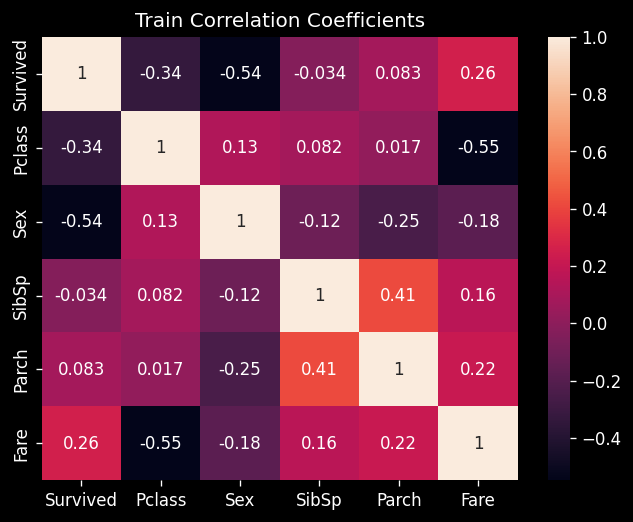

In [17]:
# display a labaled heatmap of the correlation coefficients for train
sns.heatmap(train_cleaned.corr(), annot = True)
plt.title("Train Correlation Coefficients")

**The heatmap of the pair-wise correlation coefficients show that `Survived` has a moderate negative relationship with `Pclass` and `Sex` and a weak positive relationship with `Fare`. According to the heatmap, `Survived` is not correlated with `SibSp` and `Parch`.** 

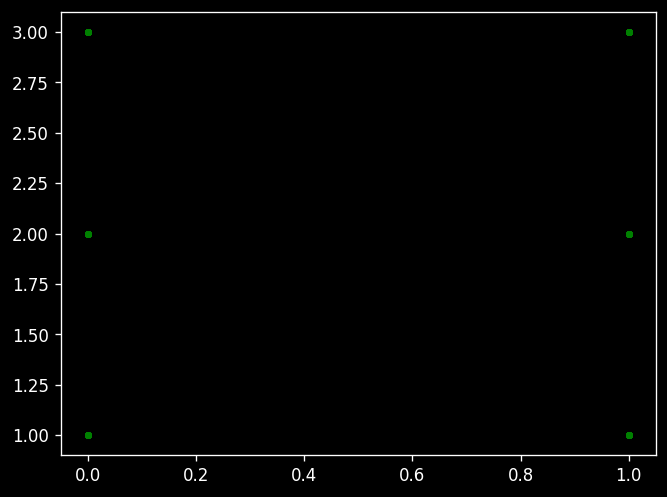

In [18]:
plt.plot(train_cleaned["Survived"], train_cleaned["Pclass"], "g.")

In [19]:
# drop the variables with no correlation
train_cleaned = train_cleaned.drop(["SibSp", "Parch"], axis = 1)

*As it can be seen in the cell above. A scatter plot does not show any meaningful information. Thus it cannot be used to determine correlations between variables for this data.*

(6) (optional) You may think that the name feature is irrelevant. However, a closer look at the names will show that some passengers have rare titles such as Dr., Mme, or Master., which indicates their high social status. Please create a column to indicate whether a passenger has a rare title.

In [20]:
# show some of the names to check the titles
train_cleaned["Name"][140:153]

141                             Nysten, Miss. Anna Sofia
142    Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...
143                                  Burke, Mr. Jeremiah
144                           Andrew, Mr. Edgardo Samuel
145                         Nicholls, Mr. Joseph Charles
146         Andersson, Mr. August Edvard ("Wennerstrom")
147                     Ford, Miss. Robina Maggie "Ruby"
148             Navratil, Mr. Michel ("Louis M Hoffman")
149                    Byles, Rev. Thomas Roussel Davids
150                           Bateman, Rev. Robert James
151                    Pears, Mrs. Thomas (Edith Wearne)
152                                     Meo, Mr. Alfonzo
153                      van Billiard, Mr. Austin Blyler
Name: Name, dtype: object

**The name of the titles seem to follow a pattern where they all end with `.` and that seems to be only the place where a `.` appears. Take advantage of this pattern to extract all the titles using a regular expression.**

In [21]:
# since the title follow, use a pattern using a regular expression to extract it
get_title = lambda name: re.search("([A-Za-z]+)\.", name)[1]

In [22]:
# test that it works
get_title(train_cleaned["Name"][2])

'Miss'

In [23]:
# store all the titles in a new column
train_cleaned["Title"] = train_cleaned["Name"].apply(get_title)

In [24]:
# count the unique titles
train_cleaned["Title"].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [25]:
# make sure the titles were extracted for all the rows
print(f"rows: {len(train_cleaned)}\ntitles: {train_cleaned.Title.value_counts().sum()}")

rows: 889
titles: 889


In [26]:
def get_title_rarity(title):
    # the three most frequent titles are common, everything else is rare
    if title in ["Miss", "Mrs", "Mr"]: return 0
    else: return 1

In [27]:
# appraise the rarity of the title
train_cleaned["Title"] = train_cleaned["Title"].apply(get_title_rarity)

In [28]:
# make sure the titles were appraised correctly
train_cleaned[-6:-4]

,Survived,Pclass,Name,Sex,Ticket,Fare,Embarked,Title
885,0,3,"Rice, Mrs. William (Margaret Norton)",0,382652,29.125,Q,0
886,0,2,"Montvila, Rev. Juozas",1,211536,13.000,S,1


#### New Variable
- `Title`: the title of the passenger represented as a rarity
    - common (0)
    - rare (1)

## Stage II: Model Construction

(1) Converting Categorical Features

1. Sex in the original dataset is categorial, and thus cannot be directly fed into Machine Learning models. Please convert the categories into 0’s and 1’s.
2. Embarked is also categorical. However, it is not ideal to simply convert the three categories into 0, 1, and 2, since it creates a bias by imposing an order to the values. Instead, we can add an indicator variable (also known as a dummy variable) for each category separately. Please replace the Embarked variable with three variables – Embarked_S, Embarked_C, and Embarked_Q – to indicate the place a passenger boarded the ship. For example, if a passenger boarded from Southamptons, Embarked_S should be set to 1, and Embarked_C and Embarked_Q should be zero. ([pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) can help you with this)


The `Sex` column is already in a numerical format. 

In [29]:
# get the dummy variables for the embarked column
train_cleaned = pd.get_dummies(train_cleaned, columns = ["Embarked"])

In [30]:
# display the columns
train_cleaned[:2]

,Survived,Pclass,Name,Sex,Ticket,Fare,Title,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,A/5 21171,7.2500,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,71.2833,0,1,0,0


---
The titles have been extracted from the `Name` column so it can be dropped. The `Ticket` column does not seem to contain meaningful information so it can also be dropped.

---

In [31]:
# drop the Name and Ticket columns
train_cleaned = train_cleaned.drop(["Name", "Ticket"], axis = 1)

In [32]:
# show the remaining columns
train_cleaned[:2]

,Survived,Pclass,Sex,Fare,Title,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,7.2500,0,0,0,1
1,1,1,0,71.2833,0,1,0,0


(2) (Optional: Feature Engineering)

Previously we noticed that some passengers’ names have rare titles, which may indicate their unusual social status. Extracting a new feature from existing data is called feature engineering. Another interesting thing you may observed is that some passenger got on board for free! This could also be a potential indicator of the social status of the passenger. Please create an indicator variable on whether a person paid for the ticket.

In [33]:
# create a new column based on whether or not a passenger paid the fare
train_cleaned["Paid"] = train_cleaned["Fare"].apply(lambda p: 1 if p > 0 else 0)

#### New Variable
- `Paid`: indicates whether or not the passenger paid for the ticket
    - Did not pay for the ticket (0)
    - Paid for the ticket (1)

(3) Feature Scaling

Machine learning models usually work best on datasets whose variables have similar ranges. Please scale each variable so that it has zero mean and unit variance (sklearn.preprocessing.StandardScaler() can help you with this).

In [34]:
# scale the data to have a mean of zero and a standard deviation of one
train_scaled = StandardScaler().fit_transform(train_cleaned)

In [35]:
# display the scaled data
train_scaled[:2]

array([[-0.78696114,  0.82520863,  0.73534203, -0.50023975, -0.28549696,
        -0.48271079, -0.30794088,  0.61679395,  0.13100562],
       [ 1.27071078, -1.57221121, -1.35991138,  0.78894661, -0.28549696,
         2.07163382, -0.30794088, -1.62128697,  0.13100562]])

In [36]:
# convert the data back into a labeled dataframe
train_scaled = pd.DataFrame(train_scaled, columns = train_cleaned.columns)
train_scaled[:2]

,Survived,Pclass,Sex,Fare,Title,Embarked_C,Embarked_Q,Embarked_S,Paid
0,-0.786961,0.825209,0.735342,-0.500240,-0.285497,-0.482711,-0.307941,0.616794,0.131006
1,1.270711,-1.572211,-1.359911,0.788947,-0.285497,2.071634,-0.307941,-1.621287,0.131006


The scaler converted the dependent variable into continous data. But since this is a classifying task, the dependent variable cannot be continous, hence convert the Survived column back to binary.

In [37]:
train_scaled["Survived"] = train_scaled["Survived"].apply(lambda x: 0 if x < 1 else 1)

(4) Extract Validation set

Because the test dataset from the website has no information on survival, it cannot be used to evaluate the performance of the model. As a result, we need to further split the data in train.csv into training set (80%) and validation set (20%). We will use training set to build the models, and use validation set to evaluate them. (`sklearn.model_selection.train_test_split()` can help you with this)

In [38]:
# split the data into 80% training and 20% testing
data_train, data_test = train_test_split(train_scaled, test_size = 0.2)

---
Before training the models, seperate the indepedent and dependent variables. The *features* (or the *independent variables*) are
the known variables used to predict the dependent variable. The *depedent* variable is the variable being predicted. Hence, it is important to not use the dependent variable to train the model.

---

In [39]:
# seperate the training data
x_train = data_train.drop(["Survived"], axis = 1)
y_train = data_train["Survived"]

In [40]:
# seperate the testing data
x_test = data_test.drop(["Survived"], axis = 1)
y_test = data_test["Survived"]

(5) Building Models

So far, we have learned five models: linear regression, polynomial regression, logistic regression, k-nearest neighbors method, and linear support vector machine. Choose at least two models that are suitable for this problem and use corresponding sklearn classes to fit the data. Note that each model class has several parameters, you are welcome to change the default parameter values and try to improve the performance of the model.


---
Logistic Regression

---

In [41]:
# parameter search
params = {"solver":["lbfgs", "sag", "saga", "newton-cg"], "mse":[]}
for solver in params["solver"]:
    logistic_model = LogisticRegression(solver = solver).fit(x_train, y_train)
    y_test_predictions = logistic_model.predict(x_test)
    mse = mean_squared_error(y_test, y_test_predictions)
    params["mse"].append(mse)
pd.DataFrame(params)

,solver,mse
0,lbfgs,0.219101
1,sag,0.219101
2,saga,0.219101
3,newton-cg,0.219101


In [42]:
# train the logistic regression model using the best parameters 
logistic_model = LogisticRegression()
lm_model = LogisticRegression().fit(x_train, y_train)
lm_predictions = lm_model.predict(x_test)

This data is small and simple enough that all the solvers have the same performance, so let's stick with the default solver.

---
K-Nearest Neighbors

---

In [43]:
# parameter search
knn_mse = []
for k in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    y_test_pred = knn.predict(x_test)
    knn_mse.append(mean_squared_error(y_test_pred, y_test))

Text(0.5, 1.0, 'MSE for different k values')

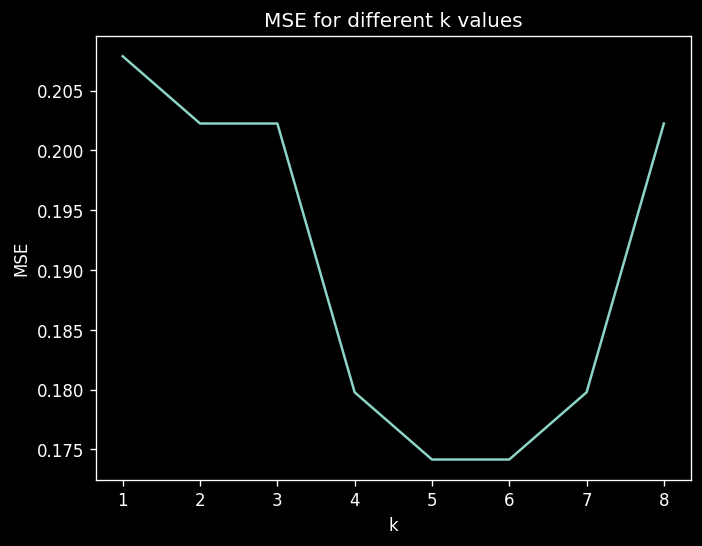

In [44]:
# plot the MSEs as a line plot to understand the rate of change as k increases
plt.plot(np.linspace(1, 8, num = 8), knn_mse)
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different k values")

**Parameter Search Results**  

The best parameter is `k = 5` because the MSE varies the least for this value of k.

In [45]:
best_k = 5

k = 5


In [46]:
# create three models using the best three k values
knn_model = KNeighborsClassifier(n_neighbors = best_k)

In [47]:
# train the model using the best k values
knn = KNeighborsClassifier(n_neighbors = best_k).fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

### Functions

Helper functions to validate the models.

In [48]:
# plots a 2x2 confusion matrix
def plot_matrix(matrix):
    # https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
    ax = sns.heatmap(matrix, annot = True, cmap = "Greens")
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Actual Values");
    ax.xaxis.set_ticklabels(["False","True"]) # in alphabetical order
    ax.yaxis.set_ticklabels(["False","True"])
    plt.show()

In [49]:
# plots and shows the scores
def validate_model(model, x_train, y_train, y_test, y_predictions):
    cm = confusion_matrix(y_test, y_predictions)
    recall = recall_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions)
    cvc_accuracies = cross_val_score(model, x_train, y_train, cv = 10)
    plot_matrix(cm)
    print(f"Recall: {recall:0.4f}\nPrecision: {precision:0.4f}")
    print(f"CV Score: {round(np.mean(cvc_accuracies), 4)}")

## Stage III: Model Selection and Interpretation

(1) Model Selection. 

For each model you have trained, perform the following evaluations on the validation set:
1. cross validation
2. confusion matrix
3. precision, and recall 

What is the best model?

---
Logistic Regression Model

---

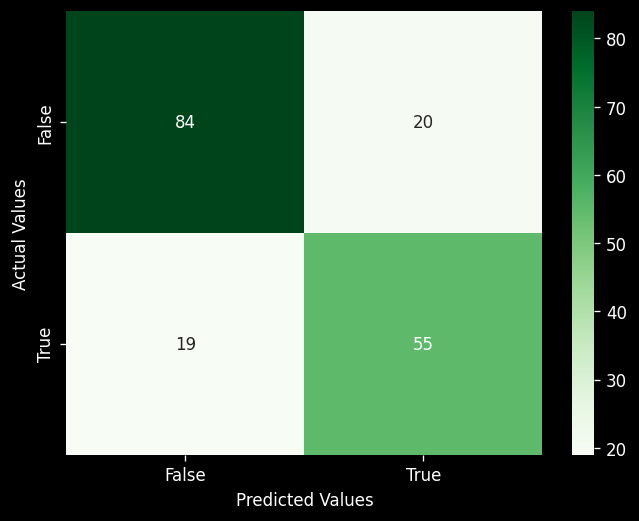

Recall: 0.7432
Precision: 0.7333
CV Score: 0.7862


In [50]:
# validate the logistic model
validate_model(logistic_model, x_train, y_train, y_test, lm_predictions)

---
K-Nearest Neighbor Model

---

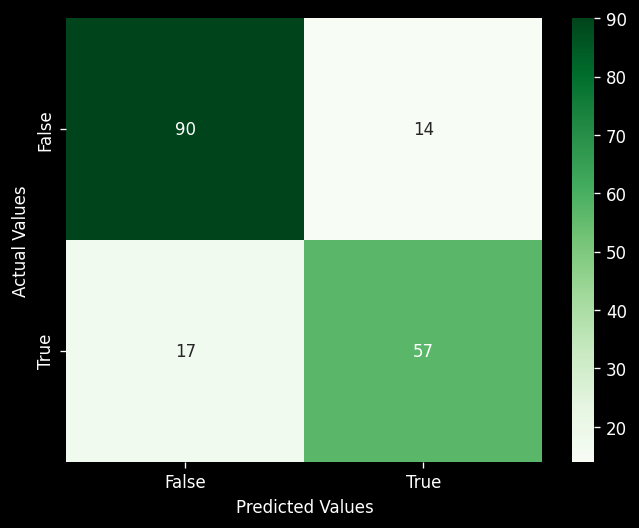

Recall: 0.7703
Precision: 0.8028
CV Score: 0.8087


In [52]:
# validate the knn model
validate_model(knn_model, x_train, y_train, y_test, knn_predictions)

**The best model is the k-nearest neighbors model for `k = 5`. It has the highest recall, precision, and cross validation score as well as a lower number of false negatives and false positives between the two models.**

(2) Model Interpretation.

Based on the model that you have selected, can you identify a few key variables that are important in predicting the survival of the passengers? Try to find out which characteristics can improve passengers’ chance of survival.


**Some of the most important variables in predicting the survival of the passengers are the sex, passenger class, and the fare. Other characteristics that can improve a passengers' chance of survival include age, age group.**

(3) (optional) Submit Results to Kaggle.com
Make predictions on the test set, submit your results to Kaggle.com. 